<a href="https://colab.research.google.com/github/ritaprova/66-days-of-data/blob/main/2021_02_01_Day_4_Non_Linear_Svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

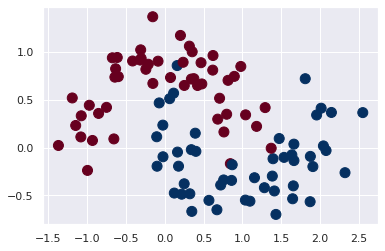

In [13]:
#data creation 
# we will bw using make_moons and adding white noise 
import numpy as np 
import pandas as pd
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=100,random_state=42,noise=0.2)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.scatter(X[:,0],X[:,1],c=y,s=100,cmap="RdBu")

In [14]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
#defining the decision function 
def decision_func(clf,ax=None,plot_support=True):
  if ax is None:
    ax = plt.gca()
  xlim = ax.get_xlim()
  ylim = ax.get_ylim()
  #creating the grid to evaluate the model 
  x = np.linspace(xlim[0],xlim[1],30)
  y = np.linspace(ylim[0],ylim[1],30)
  Y,X = np.meshgrid(y,x)
  xy = np.vstack([X.ravel(), Y.ravel()]).T
  P = clf.decision_function(xy).reshape(X.shape)

  #plotting the decision boundary and margins 
  ax.contour(X, Y, P, colors='k',
  levels=[-1, 0, 1], alpha=0.5,
  linestyles=['--', '-', '--'])
  # plot support vectors
  if plot_support:
   ax.scatter(clf.support_vectors_[:, 0],
   clf.support_vectors_[:, 1],
   s=300, linewidth=1, facecolors='none');
  ax.set_xlim(xlim)
  ax.set_ylim(ylim)

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline 
from sklearn.svm import SVC
clf = Pipeline([
                ("Standard_scaler",StandardScaler()),
                ("clf",SVC(kernel="poly",degree=3,coef0=1,C=10))
])
clf.fit(X,y)

Pipeline(memory=None,
         steps=[('Standard_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('clf',
                 SVC(C=10, break_ties=False, cache_size=200, class_weight=None,
                     coef0=1, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

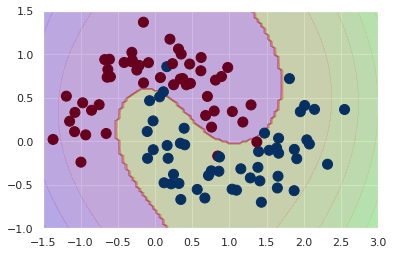

In [27]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(clf, [-1.5, 3, -1, 1.5])
plt.scatter(X[:,0],X[:,1],c=y,s=100,cmap="RdBu")